# РК2

Имя студента: Михеева Валерия, РТ5-61Б
Датасет: dc-wikia-data.csv Вариант 12
Метод 1: Дерево решений Метод 2: Градиентный бустинг

 Задача формулируется как многоклассовая классификация с тремя возможными классами: Good (положительный персонаж), Bad (отрицательный персонаж) и Neutral (нейтральный персонаж).

Набор содержит следующие переменные:

* page_id — уникальный идентификатор страницы персонажа в вики (не используется в анализе);

* name — имя персонажа;

* urlslug — ссылка на его страницу;

* ID — наличие секретной или публичной идентичности;

* ALIGN — целевая переменная, отражающая моральное выравнивание персонажа (Good, Bad, Neutral);

* EYE — цвет глаз;

* HAIR — цвет волос;

* SEX — пол персонажа;

* GSM — принадлежность к гендерным или сексуальным меньшинствам;

* ALIVE — статус персонажа (жив или мёртв);

* APPEARANCES — количество появлений в комиксах (по состоянию на сентябрь 2014);

* FIRST APPEARANCE — дата первого появления персонажа;

* YEAR — год первого появления персонажа в комиксах.

Данный датасет содержит категориальные, числовые и временные признаки, и требует соответствующей предобработки: обработки пропущенных значений, кодирования категориальных переменных и масштабирования числовых признаков. Целевая переменная (ALIGN) является категориальной с тремя классами, что позволяет применить к задаче классические алгоритмы многоклассовой классификации.

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [77]:
df = pd.read_csv('C:/Users/lerum/ML/BMSTU/3kursBase/datasets/dc-wikia-data.csv')

In [78]:
df

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6891,66302,Nadine West (New Earth),\/wiki\/Nadine_West_(New_Earth),Public Identity,Good Characters,NaN,NaN,Female Characters,NaN,Living Characters,NaN,NaN,NaN
6892,283475,Warren Harding (New Earth),\/wiki\/Warren_Harding_(New_Earth),Public Identity,Good Characters,NaN,NaN,Male Characters,NaN,Living Characters,NaN,NaN,NaN
6893,283478,William Harrison (New Earth),\/wiki\/William_Harrison_(New_Earth),Public Identity,Good Characters,NaN,NaN,Male Characters,NaN,Living Characters,NaN,NaN,NaN
6894,283471,William McKinley (New Earth),\/wiki\/William_McKinley_(New_Earth),Public Identity,Good Characters,NaN,NaN,Male Characters,NaN,Living Characters,NaN,NaN,NaN


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6896 entries, 0 to 6895
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   page_id           6896 non-null   int64  
 1   name              6896 non-null   object 
 2   urlslug           6896 non-null   object 
 3   ID                4883 non-null   object 
 4   ALIGN             6295 non-null   object 
 5   EYE               3268 non-null   object 
 6   HAIR              4622 non-null   object 
 7   SEX               6771 non-null   object 
 8   GSM               64 non-null     object 
 9   ALIVE             6893 non-null   object 
 10  APPEARANCES       6541 non-null   float64
 11  FIRST APPEARANCE  6827 non-null   object 
 12  YEAR              6827 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 700.5+ KB


In [80]:
df.nunique()

page_id             6896
name                6896
urlslug             6896
ID                     3
ALIGN                  4
EYE                   17
HAIR                  17
SEX                    4
GSM                    2
ALIVE                  2
APPEARANCES          282
FIRST APPEARANCE     774
YEAR                  79
dtype: int64

In [81]:
df = df[df['ALIGN'].notna()]
df = df.drop(['page_id', 'name', 'urlslug', 'FIRST APPEARANCE'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6295 entries, 0 to 6895
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           4550 non-null   object 
 1   ALIGN        6295 non-null   object 
 2   EYE          3030 non-null   object 
 3   HAIR         4231 non-null   object 
 4   SEX          6195 non-null   object 
 5   GSM          63 non-null     object 
 6   ALIVE        6293 non-null   object 
 7   APPEARANCES  5975 non-null   float64
 8   YEAR         6234 non-null   float64
dtypes: float64(2), object(7)
memory usage: 491.8+ KB


In [82]:
df = df[df['ALIGN'].isin(['Good Characters', 'Bad Characters', 'Neutral Characters'])]

categorical_cols = ['SEX', 'EYE', 'HAIR', 'ALIVE', 'GSM', 'ID']
for col in categorical_cols:
    df[col] = df[col].fillna('Unknown')
df['APPEARANCES'] = df['APPEARANCES'].fillna(df['APPEARANCES'].median())
df['YEAR'] = df['YEAR'].fillna(df['YEAR'].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6292 entries, 0 to 6895
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           6292 non-null   object 
 1   ALIGN        6292 non-null   object 
 2   EYE          6292 non-null   object 
 3   HAIR         6292 non-null   object 
 4   SEX          6292 non-null   object 
 5   GSM          6292 non-null   object 
 6   ALIVE        6292 non-null   object 
 7   APPEARANCES  6292 non-null   float64
 8   YEAR         6292 non-null   float64
dtypes: float64(2), object(7)
memory usage: 491.6+ KB


In [83]:
df

,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,YEAR
0,Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Unknown,Living Characters,3093.0,1939.0
1,Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Unknown,Living Characters,2496.0,1986.0
2,Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,Unknown,Living Characters,1565.0,1959.0
3,Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,Unknown,Living Characters,1316.0,1987.0
4,Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Unknown,Living Characters,1237.0,1940.0
...,...,...,...,...,...,...,...,...,...
6891,Public Identity,Good Characters,Unknown,Unknown,Female Characters,Unknown,Living Characters,6.0,1992.0
6892,Public Identity,Good Characters,Unknown,Unknown,Male Characters,Unknown,Living Characters,6.0,1992.0
6893,Public Identity,Good Characters,Unknown,Unknown,Male Characters,Unknown,Living Characters,6.0,1992.0
6894,Public Identity,Good Characters,Unknown,Unknown,Male Characters,Unknown,Living Characters,6.0,1992.0


In [84]:
df_encoded = pd.get_dummies(df[categorical_cols], drop_first=True)
X = pd.concat([df_encoded, df[['APPEARANCES', 'YEAR']]], axis=1)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X[['APPEARANCES', 'YEAR']] = scaler.fit_transform(X[['APPEARANCES', 'YEAR']])
label_map = {'Good Characters': 0, 'Bad Characters': 1, 'Neutral Characters': 2}
y = df['ALIGN'].map(label_map)

In [85]:
X

,SEX_Genderless Characters,SEX_Male Characters,SEX_Transgender Characters,SEX_Unknown,EYE_Auburn Hair,EYE_Black Eyes,EYE_Blue Eyes,EYE_Brown Eyes,EYE_Gold Eyes,EYE_Green Eyes,...,HAIR_White Hair,ALIVE_Living Characters,ALIVE_Unknown,GSM_Homosexual Characters,GSM_Unknown,ID_Public Identity,ID_Secret Identity,ID_Unknown,APPEARANCES,YEAR
0,False,True,False,False,False,False,True,False,False,False,...,False,True,False,False,True,False,True,False,3093.0,1939.0
1,False,True,False,False,False,False,True,False,False,False,...,False,True,False,False,True,False,True,False,2496.0,1986.0
2,False,True,False,False,False,False,False,True,False,False,...,False,True,False,False,True,False,True,False,1565.0,1959.0
3,False,True,False,False,False,False,False,True,False,False,...,True,True,False,False,True,True,False,False,1316.0,1987.0
4,False,True,False,False,False,False,True,False,False,False,...,False,True,False,False,True,False,True,False,1237.0,1940.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6891,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,True,True,False,False,6.0,1992.0
6892,False,True,False,False,False,False,False,False,False,False,...,False,True,False,False,True,True,False,False,6.0,1992.0
6893,False,True,False,False,False,False,False,False,False,False,...,False,True,False,False,True,True,False,False,6.0,1992.0
6894,False,True,False,False,False,False,False,False,False,False,...,False,True,False,False,True,True,False,False,6.0,1992.0


In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

### Обучение моделей

In [87]:
# Дерево 
tree_model = DecisionTreeClassifier(max_depth=10, random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

In [88]:
# Градиентный бустинг
boost_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
boost_model.fit(X_train, y_train)
y_pred_boost = boost_model.predict(X_test)

### Оценка моделей

In [89]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n моделька: {model_name}")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"F1 (macro): {f1_score(y_true, y_pred, average='macro'):.4f}")
    print("Метрики:")
    print(classification_report(y_true, y_pred, target_names=['Good', 'Bad', 'Neutral']))

evaluate_model(y_test, y_pred_tree, "Дерево решений")
evaluate_model(y_test, y_pred_boost, "Градиентный бустинг")


 моделька: Дерево решений
Accuracy: 0.6124
F1 (macro): 0.4652
Метрики:
              precision    recall  f1-score   support

        Good       0.62      0.61      0.62       567
         Bad       0.62      0.72      0.66       579
     Neutral       0.31      0.07      0.12       113

    accuracy                           0.61      1259
   macro avg       0.52      0.47      0.47      1259
weighted avg       0.59      0.61      0.59      1259


 моделька: Градиентный бустинг
Accuracy: 0.6418
F1 (macro): 0.4475
Метрики:
              precision    recall  f1-score   support

        Good       0.64      0.66      0.65       567
         Bad       0.64      0.75      0.69       579
     Neutral       0.00      0.00      0.00       113

    accuracy                           0.64      1259
   macro avg       0.43      0.47      0.45      1259
weighted avg       0.58      0.64      0.61      1259



In [91]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


C:\Users\lerum\AppData\Local\Temp\ipykernel_8636\3868345252.py:10: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\lerum\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


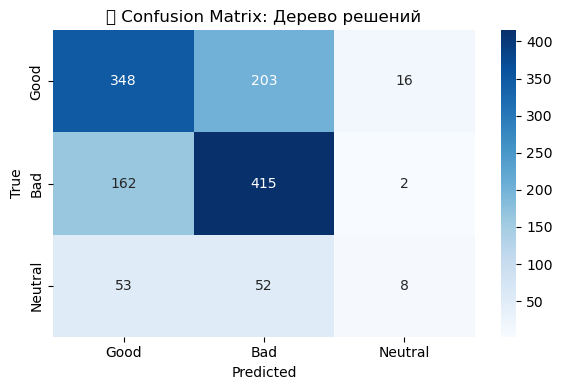

C:\Users\lerum\AppData\Local\Temp\ipykernel_8636\3868345252.py:10: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\lerum\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


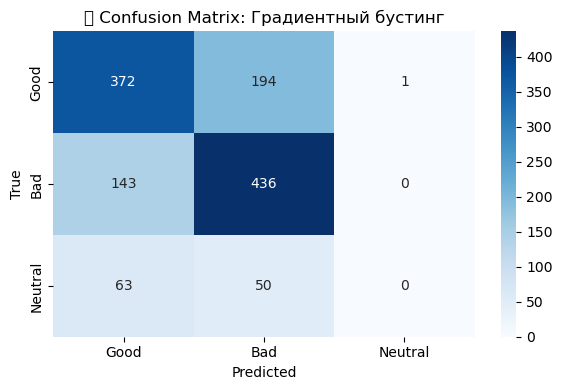

In [92]:
def plot_confusion(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Good', 'Bad', 'Neutral'],
                yticklabels=['Good', 'Bad', 'Neutral'])
    plt.title(f'📉 Confusion Matrix: {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.show()

plot_confusion(y_test, y_pred_tree, "Дерево решений")
plot_confusion(y_test, y_pred_boost, "Градиентный бустинг")


На этапе предобработки из датасета были удалены нерелевантные столбцы (page_id, name, urlslug), а также строки с пропущенными значениями в целевой переменной. Категориальные признаки, такие как цвет глаз, цвет волос, пол и другие, были закодированы с помощью one-hot кодирования, что позволило преобразовать их в числовой формат без введения лишнего порядка в данные. Числовые переменные APPEARANCES и YEAR, обладающие разным масштабом, были нормализованы с использованием MinMaxScaler, что особенно важно для алгоритмов, чувствительных к масштабу признаков.

В качестве моделей были выбраны дерево решений и градиентный бустинг. Обе модели обучались на 80% данных, а оставшиеся 20% использовались для тестирования.

Для оценки качества работы моделей использовались метрики Accuracy и F1-мера с макроусреднением (F1 macro). Accuracy отражает общую долю верно предсказанных объектов, однако при несбалансированных классах она может давать ложное представление о качестве модели. Поэтому дополнительно использовалась макро F1-мера, которая учитывает точность и полноту по каждому классу независимо и усредняет результат, позволяя оценить модель более справедливо при наличии редких классов. Также строилась матрица ошибок, чтобы визуально оценить, какие классы чаще всего путаются.

Модель дерева решений показала Accuracy 0.61 и F1 (macro) 0.46. Классы Good и Bad были предсказаны с приемлемой точностью, однако модель почти полностью игнорировала класс Neutral, что связано с его малой представленностью в данных. Модель градиентного бустинга обеспечила немного более высокую точность (0.64), но F1-мера снизилась до 0.45, поскольку класс Neutral предсказывался ещё хуже — по сути, модель полностью его игнорировала. Это особенно ярко отразилось на матрице ошибок, где практически все представители этого класса были отнесены к более многочисленным категориям.

Таким образом, можно сделать вывод, что обе модели испытывают трудности с классификацией редкого класса из-за сильного дисбаланса в распределении целевой переменной. При этом градиентный бустинг показывает немного лучшую общую точность, но дерево решений обеспечивает чуть более равномерное распределение предсказаний между классами.